<p style="text-align: center;"><strong><span style="font-family: Tahoma;font_size:30">CO-EFFICIENT OF DETERMINATION &amp; CORELATION CO-EFFICIENT</span></strong></p>
<ol>
    <li style='font-family: "Comic Sans MS", sans-serif;'>The coefficient of determination (R&sup2; or r-squared) is a statistical measure in a <span style="font-family: Verdana, Geneva, sans-serif;">regression model that determines the proportion of variance in the dependent variable that can be explained by the <a href="https://corporatefinanceinstitute.com/resources/knowledge/modeling/independent-variable/" title="">independent variable</a>.&nbsp;</span></li>
    <li style="font-family: Verdana, Geneva, sans-serif;">In other words, the coefficient of determination tells one how well the data fits the model (the goodness of fit).&nbsp;</li>
</ol>

Ref: https://www.scribbr.com/statistics/correlation-coefficient/

Sum of Square Error :

Assume that we have only tips data not the actual bill amount . So if you predict the next possible tip amount could be the mean of the all tips. 

Mean (In case no Bill data) =10 

SSE = square(y-y_bar)



In [37]:
import pandas as pd
data = {'bill':[34,108,64,88,99,51],'tip':[5,17,11,8,14,5]}

df =pd.DataFrame(data)
df

bill  tip
0    34    5
1   108   17
2    64   11
3    88    8
4    99   14
5    51    5

In [38]:
y_bar=df['tip'].mean()
variance_list=[(i-y_bar)**2 for i in df['tip']]
SSE= sum(variance_list)
SSE

120.0

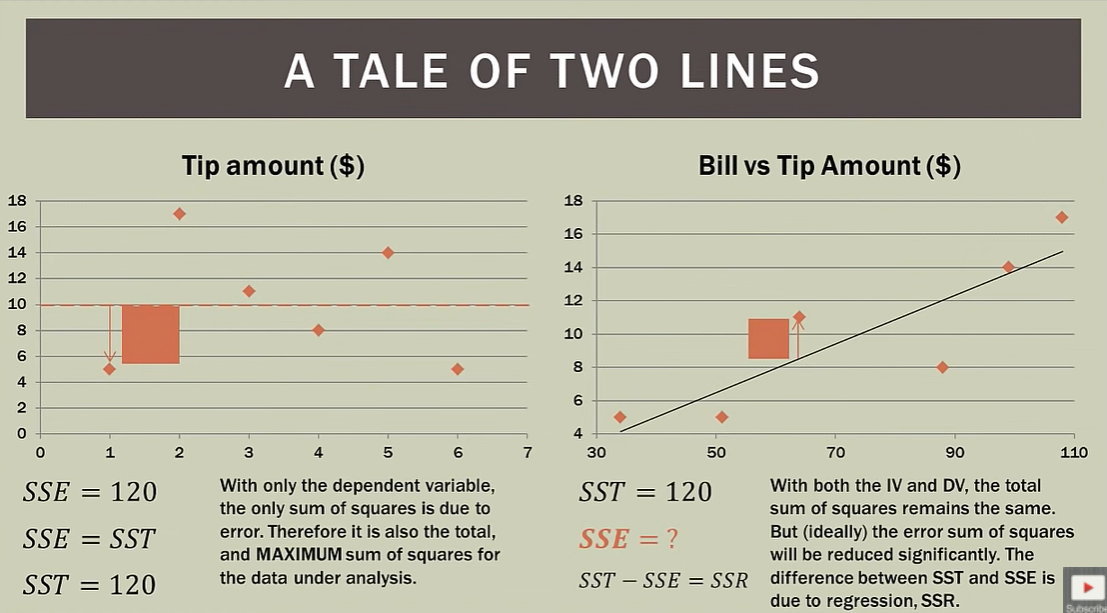

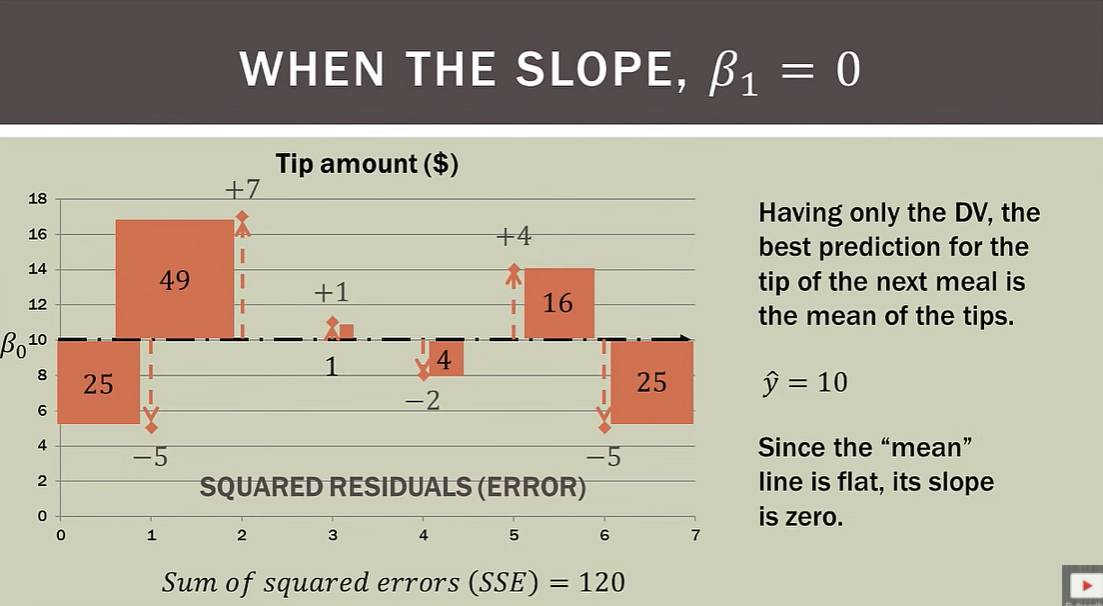

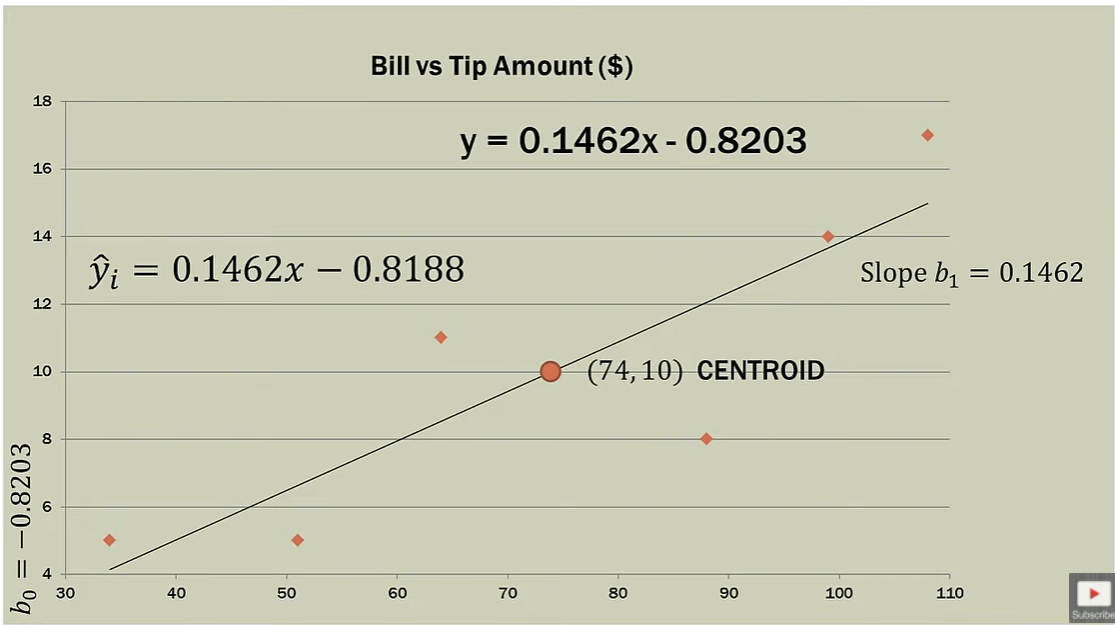

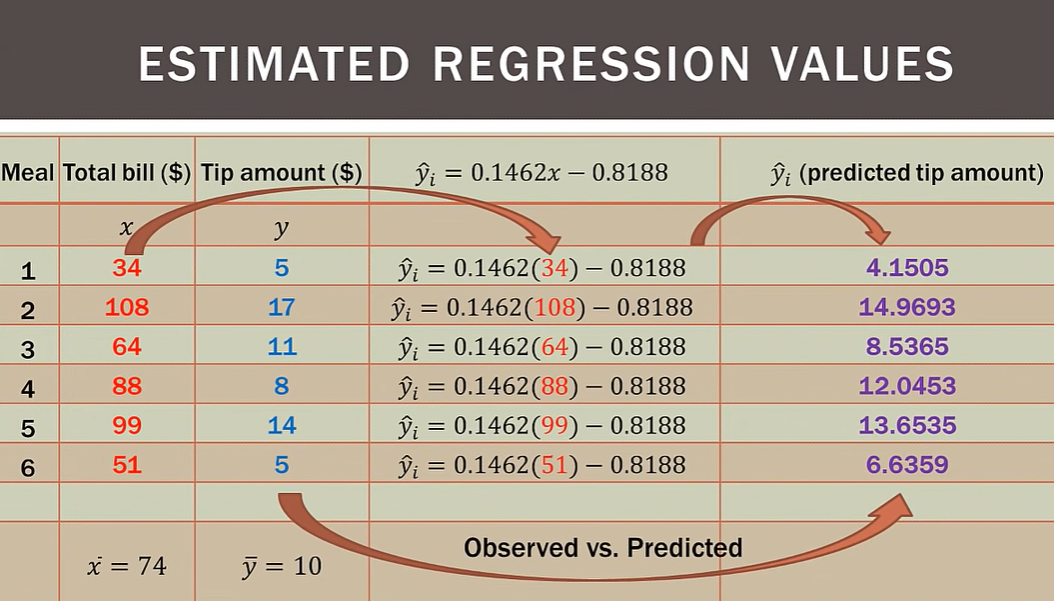

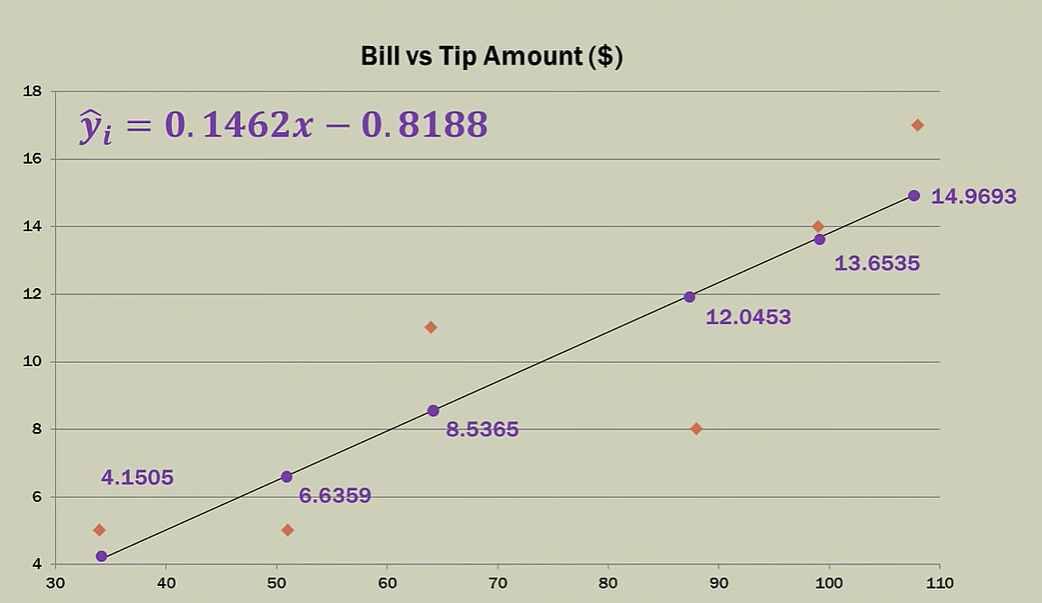

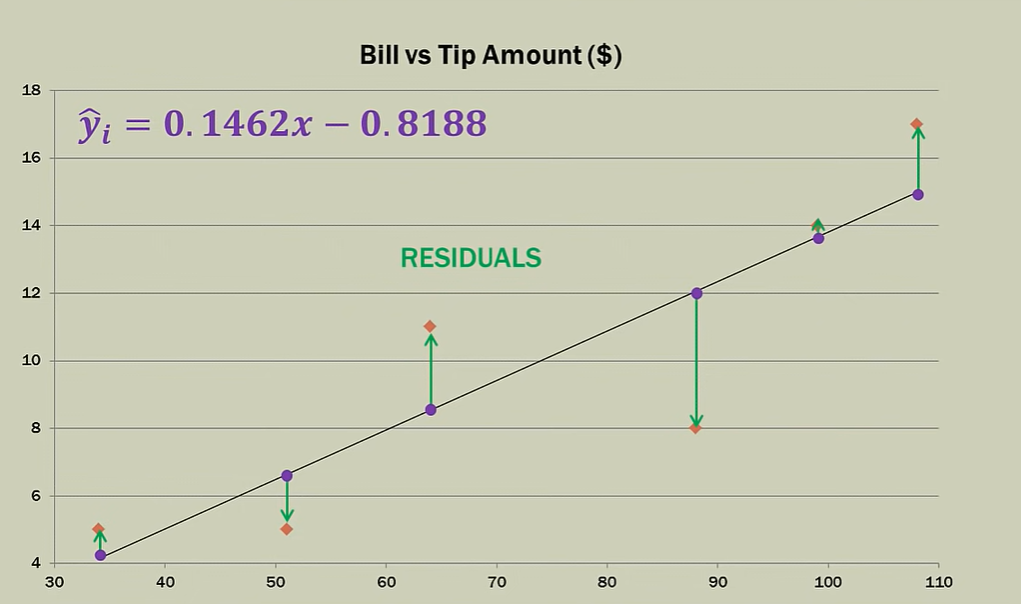

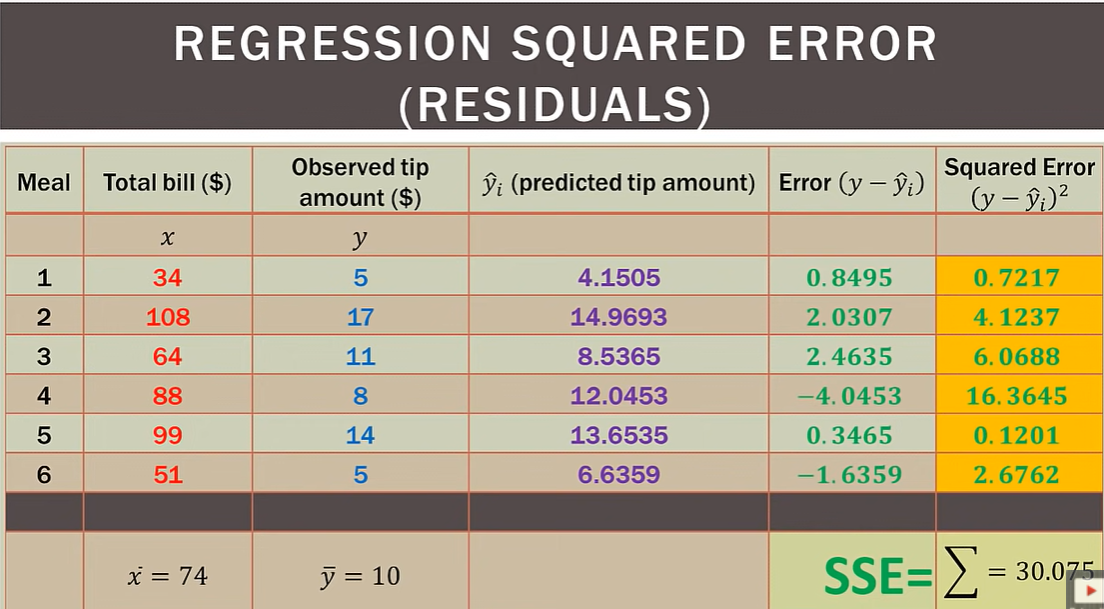

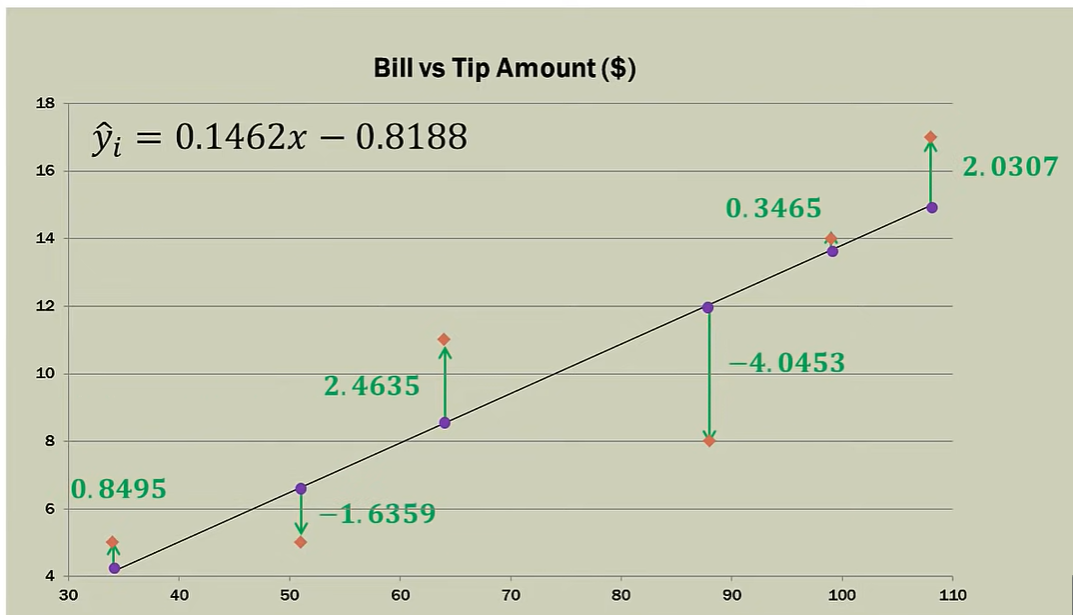

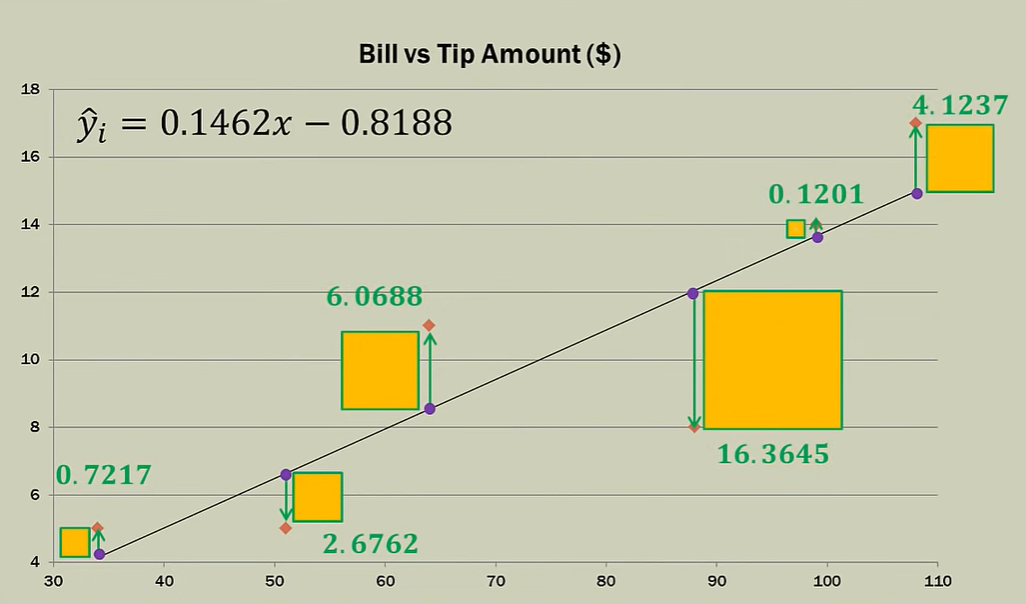

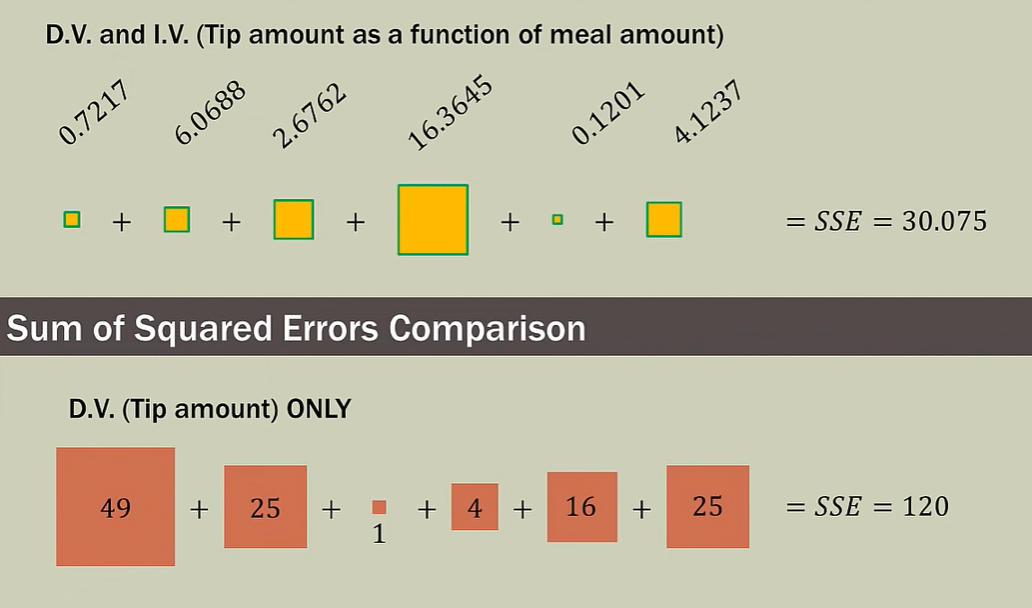

In [39]:
# The SST remains the same even if we introduce the IV 
# Because of regression, we can increase the fitness of data thereby we can reduce the error (SSR) from SST

#governing_equation:
#y_pred = 0.1462*x-0.8188
import numpy as np

y_pred_list = [(0.1462*i-0.8188) for i in df['bill']]
y_pred_arr = np.array(y_pred_list)

actual_y_arr = np.array(df['tip'])

var_arr= (actual_y_arr-y_pred_arr)**2
SSE = sum(var_arr)

print('SSE is:' , SSE)


SSE is: 30.074894640000007


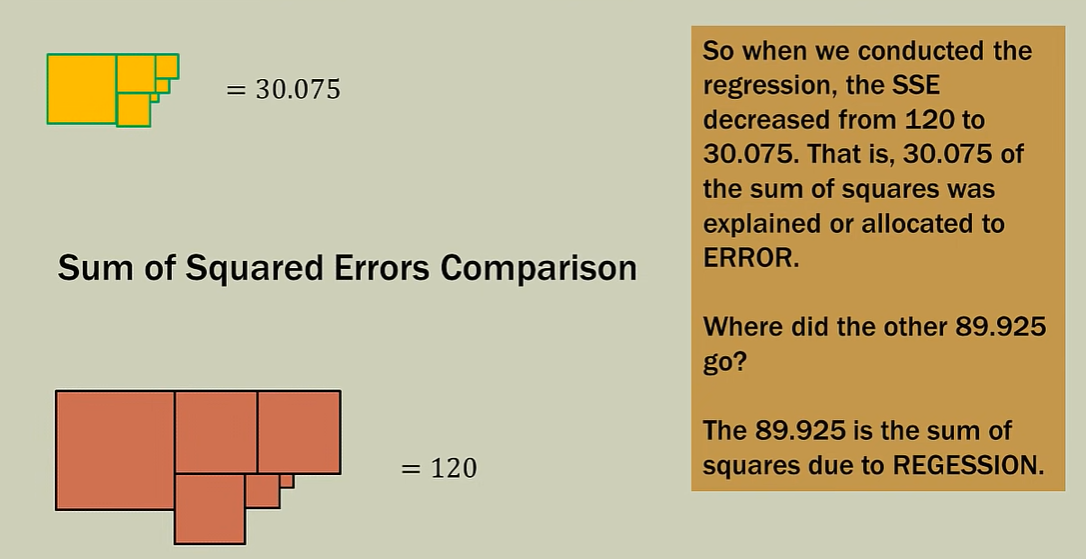

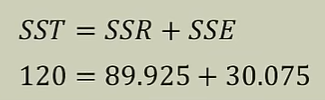

In [40]:
# We know that SST = 120 
# SSE = 30.0748
# SST = SSE+SSR 
SSR = 120-30.0748
SST = 120 
print('SSR :', SSR)

SSR : 89.9252


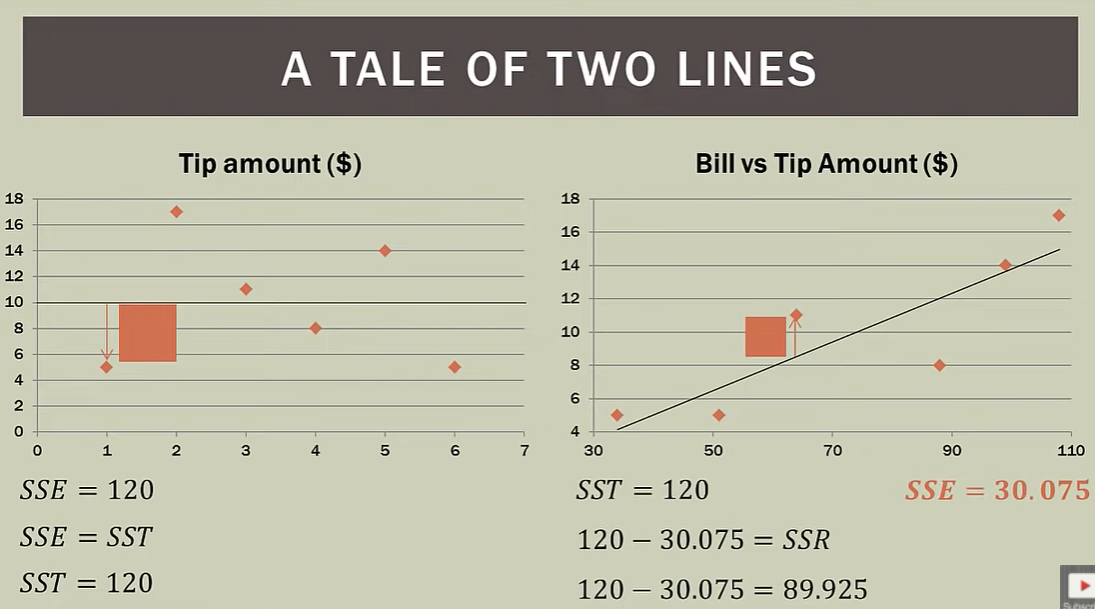

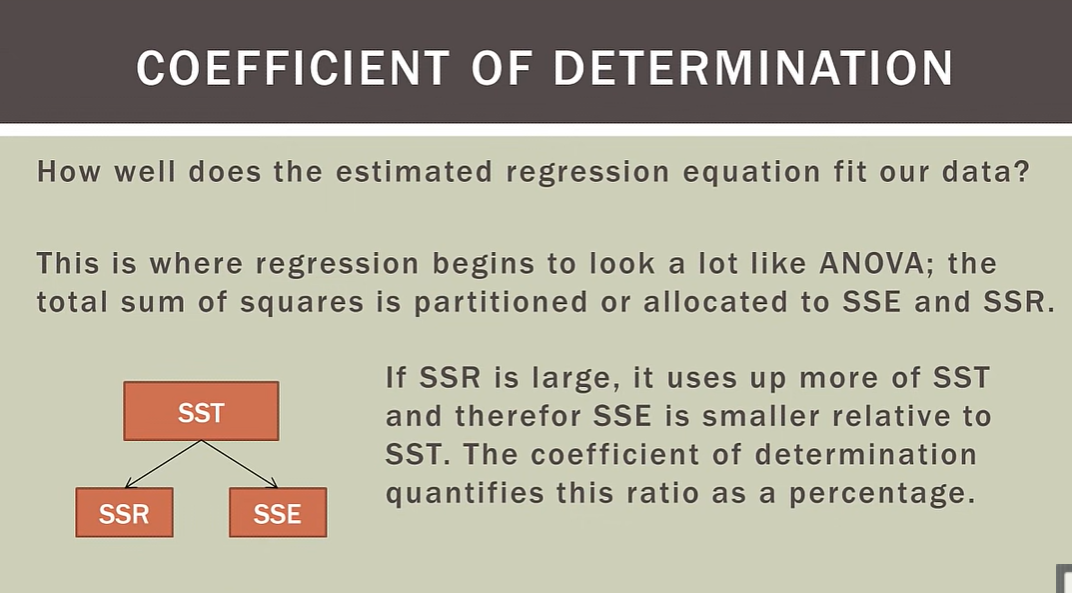

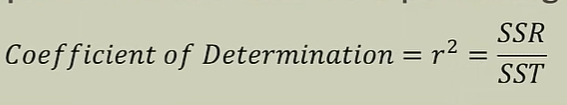

In [41]:
coef_of_determinaion =  SSR/ SST
print('coef_of_determinaion' ,coef_of_determinaion)

coef_of_determinaion 0.7493766666666667


In [42]:
# Running the simple regression in ANOVA 

import numpy as np
import matplotlib.pyplot as plt
import pandas

# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm


model = ols("tip ~ bill", data=df).fit()

# Print the summary
print(model.summary())

# Peform analysis of variance on fitted linear model
anova_results = anova_lm(model)

print('#'*100)
print('\nANOVA results')
print(anova_results)
print('#'*100)

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     11.96
Date:                Mon, 09 May 2022   Prob (F-statistic):             0.0259
Time:                        12:25:14   Log-Likelihood:                -13.349
No. Observations:                   6   AIC:                             30.70
Df Residuals:                       4   BIC:                             30.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8203      3.323     -0.247      0.8

C:\Users\Z028726\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


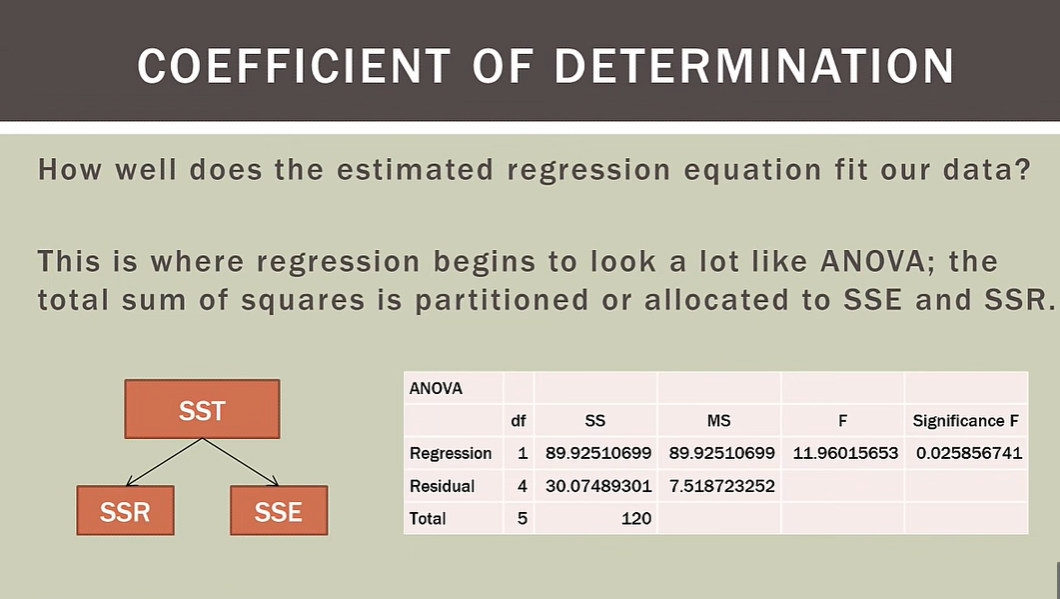

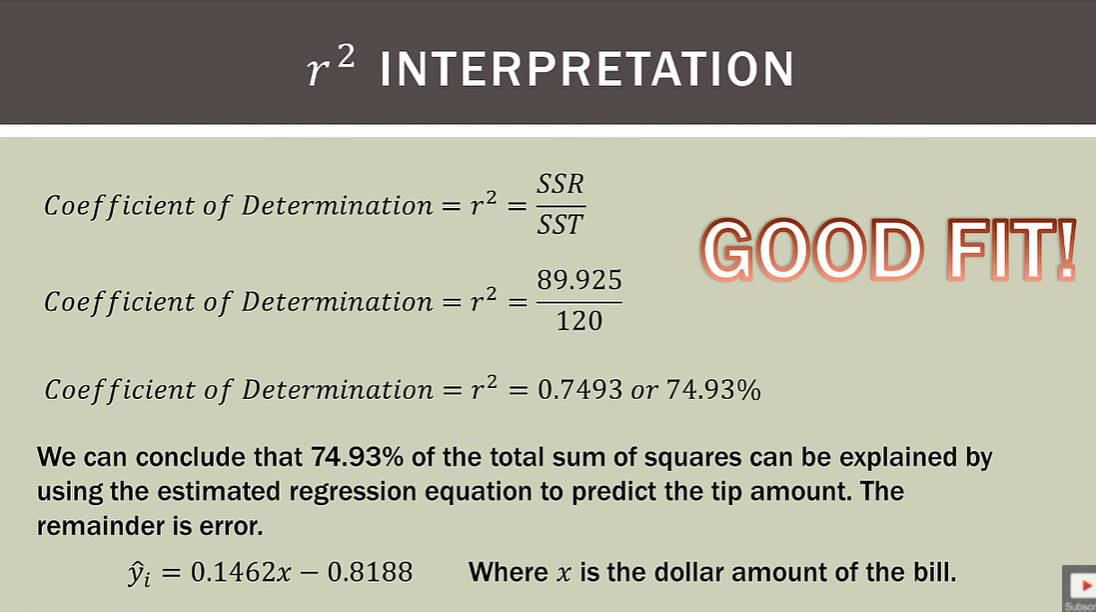

<p><span style='font-family: "Arial Black", Gadget, sans-serif; color: rgb(184, 49, 47);'>A good regression model </span></p>
<ol>
    <li class="Please set custom CSS styles in Settings">Should reduce SSE&nbsp;</li>
    <li class="Please set custom CSS styles in Settings">Has the tendency to capture more SSR&nbsp;</li>
    <li class="Please set custom CSS styles in Settings">Has high co efficient of determination</li>
</ol>

# Showing all Square differences in one picture

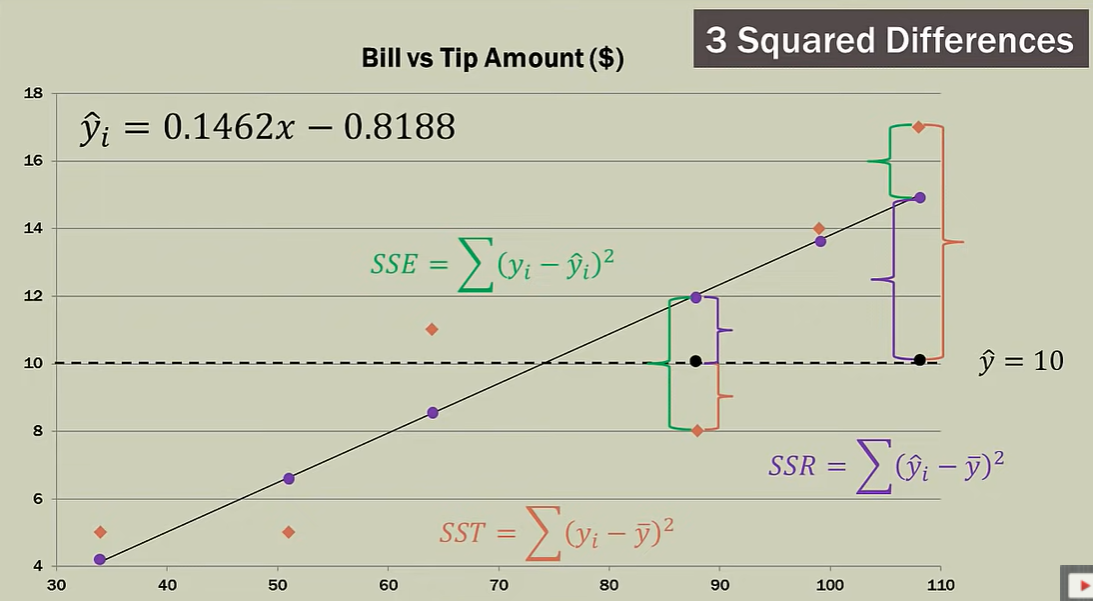

# SKLEARN way of measuring coefficient of determination

In [56]:
from sklearn.linear_model import LinearRegression as LR 


# Reshape the Independent variable like 6 rows and 1 column
arr = np.array(df['bill'],dtype='int8')
#print(arr)
X =arr.reshape(-1, 1)
#print(X)
print('The shape of the independent variable or Predictor is :', X.shape)

y= np.array(df['tip'])

# Fiting to the model
reg = LR().fit(X,y)



#Unpacking the result
print('The slope is :', reg.coef_)
print('The intercept is :',reg.intercept_)

#Getting the coefficient of determination 
r_square = reg.score(X, y)
print('The coefficient of determination (r**2):',r_square)



The shape of the independent variable or Predictor is : (6, 1)
The slope is : [0.14621969]
The intercept is : -0.8202567760342401
The coefficient of determination (r**2): 0.7493758915834522


In [57]:
# CO RELATION CO EFFICIENT R 
#sqrt(coefficient_of_determination)
r = np.sqrt(r_square)

print('Co relation coefficient (r): ', r)

Co relation coefficient (r):  0.865664999629448


In [58]:
# Validate co relation co eff

df.corr()

bill       tip
bill  1.000000  0.865665
tip   0.865665  1.000000